# Petrea Norgren & Siri Strøm

## Step 1
- Load CSV file and inspect structure
- Identify predictors
- Check missing values and class balance

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Dataset1.csv",sep=",")
df.head()
df.info()

print("How many users did or did not purchase product?")
print(df["Purchased"].value_counts())

print("How many values are missing?")
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
How many users did or did not purchase product?
Purchased
0    257
1    143
Name: count, dtype: int64
How many values are missing?


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### Questions:
- There are 400 observations and 4 variables.
- There were 257 people who did not purchase the product, but 143 people who did. BALANCED OR NOT????
- No values are missing.

## Step 2

- Create a scatter plot in feature space
- Color points by purchased

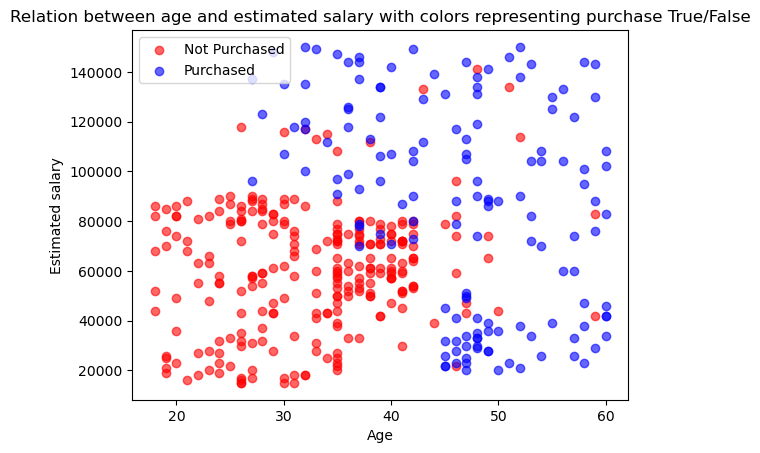

In [32]:
X = df["Age"]
y = df["EstimatedSalary"]
purchased = df["Purchased"]

plt.scatter(X[purchased == 0], y[purchased == 0], 
            color="red", alpha=0.6, label="Not Purchased")

plt.scatter(X[purchased == 1], y[purchased == 1], 
            color="blue", alpha=0.6, label="Purchased")

plt.xlabel("Age")
plt.ylabel("Estimated salary")
plt.title("Relation between age and estimated salary with colors representing purchase True/False")
plt.legend()
plt.show()

### Questions:
- The classes appear to not be linear as one straight line would not be enough to separate the classes from eachother.
- If we had to choose, a linear decision boundary would look something like: 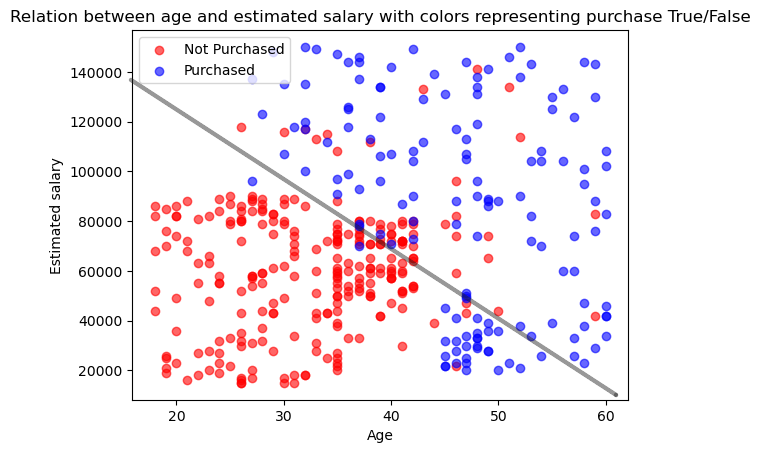

## Step 3

- Split data into train and test sets
- Fit logistic regression
- Extract coefficients and interpret signs

In [42]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 

X = df[["Age", "EstimatedSalary"]]
y = df["Purchased"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = LogisticRegression().fit(X_train,y_train)
print(f"intercept: ",clf.intercept_)
print(f"beta1(age) and beta2(salary): ",clf.coef_)

intercept:  [-10.8903435]
beta1(age) and beta2(salary):  [[1.93817366e-01 3.46069876e-05]]


### Questions:
- The intercept is negative, whilst the two other coefficients are positive.
- Both Age and Salary increase the odds of purchase.

## Step 4

- Use trained model to predict:
  - Class labels
  - Predicted probabilities
- Evaluate model accuracy on test set

In [47]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
clf.predict_proba(X_test)
print(f"accuracy score: ", accuracy_score(y_test, y_pred))

accuracy score:  0.8333333333333334


### Questions:
- The difference between the predicted probabilites and predicted classes are ...
- The model is around 83% accurate on the test set.
- No, accuracy alone is not sufficient to evaluate performance. $\textit{Accuracy} = \frac{\# \textit{Correct predictions}}{\# \textit{Total predictions}}$. This means that the result can be misleading if for example the classes are imbalanced. It also ignores the quality of the predicted probabilities.

## Step 5

- Recompute confusion matrices for different values of $\tau$

In [48]:
clf.predict_proba(X_test)[:,1]

array([0.22910162, 0.97315062, 0.01906317, 0.85007136, 0.01337841,
       0.05068122, 0.87236356, 0.08338188, 0.36769344, 0.37740909,
       0.13502023, 0.6361319 , 0.00839733, 0.00198919, 0.11254401,
       0.40873893, 0.62321693, 0.64248644, 0.1326219 , 0.88491782,
       0.00336159, 0.07578244, 0.27190742, 0.95988304, 0.00142767,
       0.44776699, 0.50463609, 0.13182356, 0.98362494, 0.00152983,
       0.36450634, 0.00828225, 0.74468969, 0.06125461, 0.6376777 ,
       0.1807593 , 0.13994864, 0.21826099, 0.00805893, 0.00637893,
       0.39053133, 0.01292806, 0.00367666, 0.25184666, 0.0048774 ,
       0.92041448, 0.04075322, 0.08129287, 0.45804304, 0.05665496,
       0.0351972 , 0.90200909, 0.1649431 , 0.03639148, 0.27877585,
       0.01010611, 0.98619211, 0.14585756, 0.08939145, 0.09518793,
       0.23525451, 0.10582285, 0.90910771, 0.07924502, 0.03162581,
       0.28574968, 0.59015708, 0.96092746, 0.21591139, 0.35806309,
       0.98136538, 0.01384049, 0.02533099, 0.00320318, 0.35336

- If the threshold is lowered ...
- If the threshold is increased ...
- The types of error that are affected is ...